Сервис  “Мой Чемпион” помогает спортивным школам фигурного катания, тренерам мониторить результаты своих подопечных и планировать дальнейшее развитие спортсменов.

**Описание данных**
***
`units`

Юнит – спортивная единица. Мы работаем с одиночным катанием, в одном юните только один
спортсмен. Если бы были пары/команды, то было б несколько спортсменов в юните.
 - `id`: идентификатор юнита
 - `color`: категория
 - `school_id`: идентификатор школы
***
`tournaments`

Турнир состоит из нескольких категорий, оценки по категориям расписаны в `total_scores`
 - `id`: идентификатор турнира
 - `date_start`: дата начала
 - `date_end`: дата завершения
 - `origin_id`: место проведения
***  
`total_scores`

Оценки за выступления по категориям и общие за турнир
 - `id`: идентификатор выступления, джойнится с tournament_scores.total_score_id
 - `unit_id`: идентификатор юнита, ключ к units.id
 - `tournament_id`: идентификатор турнира, tournaments.id
 - `components_score`: артистизм (мастерство, композиция, хореография)
 - `base_score`: базовая оценка за элементы в выступлении (идеал)
 - `elements_score`: реальная оценка всех выполненных элементов, base_score+goe
 - `decreasings_score`: снижения оценок за ошибки
 - `total_score`: components_score+elements_score+decreasings_score за выступление
 - `starting_place`:
 - `place`: занятое место в категории category_name+segment_name
 - `segment_name`: название сегмента
 - `info`: комментарии и пояснения к оценке
 - `overall_place`: итоговое место в турнире
 - `overall_total_score`: итоговая оценка за весь турнир
 - `overall_place_str`: комментарии, пояснения
***
`tournament_scores`

Таблица с оценками поэлементно
 - id: идентификатор оценки за конкретный элемент/комбинацию
 - total_score_id: идентикатор выступления, ключ total_scores.id
 - title: запись элемента или комбинации элементов с отметками об ошибках
 - decrease: за что снижена оценка
 - base_score: базовая оценка (идеал, цена данного элемента/комбинации, сложность)
 - goe: Grade of Execute, качество исполнения, судейские надбавки/убавки
 - avg_score: оценка за элемент/комбинацию (усредненная по судьям)
***
Расшифровка элементов `tournaments_scores.title`

Разбираем только одиночное катание. Есть 3 типа элементов:
 - Прыжки: начинаются с цифры от 1 до 4, потом идет код прыжка, потом может стоять один
из специальных кодов
 - Вращения. Сначала идет код вращения, после которого стоит уровень (B – базовый, 1, 2, 3,
4). Если после элемента стоит NV – not value значит элемент не выполнен.
 - Шаги. Два варианта. Может быть так же как у вращений 5 уровней и NV – StSqB, StSq1 и
тд.
 - Внимание:
    - Могут попадаться базовые уровни без литеры В, например ChSt или CCoSp
     - Иногда прыжки иногда указаны без цифры
     - Также могут встречаться отдельные элементы из других групп
 - Ошибки:
     - q – недокрут прыжка в четверть оборота. Базовая стоимость при такой ошибке
остается неизменной, но судьи обязательно снизят за это GOE
     -  < – спортсмен провращался в воздухе на 90°-180 ° меньше, чем положено,
"недокрутил". Стоимость прыжка за такую ошибку не сильно, но снижают.
     - << – спортсмен недокрутил более 180°. Стоимость прыжка становится, как если бы
прыгнул на один оборот меньше
     - e – Этот знак ставится, когда фигурист отталкивается от льда с неправильного
ребра. Правильные ребра: на лутце – наружное, на флипе – внутреннее. На
базовую стоимость влияет ровно на то же количество баллов, что и <
     - ! – Этот знак так же ставится только у флипа и лутца в случае, если технический
специалист посчитал, что отрыв происходит с "нечеткого ребра". На базовую
стоимость прыжка эта ошибка не влияет, но судьи обязательно её учтут при
выставлении GOE
     - COMBO – Не выполнен обязательный каскад в короткой программе. Этот знак после
прыжка, например: 3Lz+COMBO, говорит о том, что спортсмен должен был
исполнить каскад прыжков, но, по какой-то причине (чаще всего падение), не смог.
На оценку не влияет, но оставляет плохое впечатление у судейской бригады.
     - REP – Обозначает ошибку, похожую на COMBO, но в произвольной программе. По
правилам, в произвольной программе фигурного катания один и тот же прыжок
второй раз можно исполнить только в составе каскада или комбинации. Если по
каким то причинам спортсмен оба раза прыгнул прыжок сольно, то ко второй
попытке добавляют этот знак и базовую стоимость уменьшают на 30%.
     - SEQ – Комбинация прыжков. Фигурист сразу после любого прыжка делает аксель. В
этом случае SEQ означает, что была исполнена комбинация прыжков. Раньше
базовая стоимость прыжков, исполненных в комбинации, умножалась на
коэффицент 0.8, с сезона 2022 стоимость комбинации приравнивается к каскаду
 - Бонус:
     - x – Элемент исполнен во второй половине программы. Отностится только к
прыжкам! Если прыжок сделан во второй половине программы, его базовая
стоимость умножается на коэффициент 1.1. Недавно введено ограничение – только
три последних прыжка получат бонус. Ввели это ограничение, потому что многие
спортсмены переносили все свои прыжки во вторую часть.

Полезные ссылки
 - https://calculatorfs.ru/rules-fs/conventions/
 - https://calculatorfs.ru/rules-fs/all-about-goe/#example2
 - https://eislauf-union.de/files/users/997/Elemente-Liste2023_24.pdf
 - https://usfigureskating.org/sites/default/files/media-files/Scoring%20Cheat%20Sheet.pdf
 - https://www.isu.org/inside-isu/rules-regulations/isu-congresses/17142-isu-communication-2168/file
 - https://dash.harvard.edu/bitstream/handle/1/39011778/ZHU-SENIORTHESIS-2018.pdf
 - https://usfigureskatingssmcblogdotcom.wordpress.com/wp-content/uploads/2012/08/landing-for-success-a-biomechanical-and-perceptual-analysis-of-on-ice-jumps-in-figure-skating.pdf

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
total_scores = pd.read_csv("C:/Users/Андрей Владимирович/Documents/Jupyter/Мой Чемпион/data_01_predict_progress/total_scores.csv")
tournament_scores = pd.read_csv("C:/Users/Андрей Владимирович/Documents/Jupyter/Мой Чемпион/data_01_predict_progress/tournament_scores.csv")
tournaments = pd.read_csv("C:/Users/Андрей Владимирович/Documents/Jupyter/Мой Чемпион/data_01_predict_progress/tournaments.csv")
units = pd.read_csv("C:/Users/Андрей Владимирович/Documents/Jupyter/Мой Чемпион/data_01_predict_progress/units.csv")

In [3]:
# Список названий датафреймов
df_names = ["Total Scores", "Tournament Scores", "Tournaments", "Units"]

# Список датафреймов для отображения
dfs_to_display = [total_scores, tournament_scores, tournaments, units]

# Проходим по списку названий и соответствующих датафреймов
for name, df in zip(df_names, dfs_to_display):
    print(f"\n{name}:")
    display(df)
    print("\nИнформация о датафрейме:")
    display(df.info())
    print("\n---")


Total Scores:


,id,unit_id,tournament_id,base_score,components_score,total_score,elements_score,decreasings_score,starting_place,place,segment_name,info,overall_place,overall_total_score,overall_place_str
0,442027,304,4785,47.20,43.47,102.70,59.23,0.0,17,1,Короткая программа,x Надбавка за прыжки во второй половине програ...,2,293.74,2
1,442028,604,4785,45.40,46.71,101.19,54.48,0.0,18,2,Короткая программа,q Прыжок приземлён в четверть x Надбавка за пр...,1,294.75,1
2,442029,409,4785,44.00,46.82,99.20,52.38,0.0,6,3,Короткая программа,q Прыжок приземлён в четверть x Надбавка за пр...,4,285.57,4
3,442030,524,4785,46.20,44.86,91.84,47.98,-1.0,3,4,Короткая программа,q Прыжок приземлён в четверть x Надбавка за пр...,3,292.42,3
4,442031,412,4785,44.20,42.59,89.73,48.14,-1.0,15,5,Короткая программа,q Прыжок приземлён в четверть x Надбавка за пр...,6,265.34,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21296,462405,34979,7116,21.67,26.02,46.62,21.10,-0.5,6,20,Произвольная программа,q Прыжок приземлён в четверть x Надбавка за пр...,20,71.66,20
21297,462406,1995,7116,23.20,25.50,46.22,21.22,-0.5,7,21,Произвольная программа,q Прыжок приземлён в четверть e Явно неправиль...,21,71.27,21
21298,462407,34841,7116,21.83,25.00,45.46,20.96,-0.5,5,22,Произвольная программа,q Прыжок приземлён в четверть << Пониженный пр...,22,70.49,22
21299,462408,34980,7116,21.17,26.00,45.24,20.74,-1.5,2,23,Произвольная программа,q Прыжок приземлён в четверть < Недокрученный ...,24,68.22,24



Информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21301 entries, 0 to 21300
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   21301 non-null  int64  
 1   unit_id              21301 non-null  int64  
 2   tournament_id        21301 non-null  int64  
 3   base_score           21301 non-null  float64
 4   components_score     21301 non-null  float64
 5   total_score          21301 non-null  float64
 6   elements_score       21301 non-null  float64
 7   decreasings_score    21301 non-null  float64
 8   starting_place       21301 non-null  int64  
 9   place                21301 non-null  int64  
 10  segment_name         21284 non-null  object 
 11  info                 20720 non-null  object 
 12  overall_place        21301 non-null  int64  
 13  overall_total_score  21284 non-null  float64
 14  overall_place_str    10814 non-null  object 
dtypes: float64

None


---

Tournament Scores:


,id,total_score_id,title,decrease,base_score,goe,avg_score
0,1,1,2A,NaN,3.3,0.66,3.96
1,2,1,3F+3Lo,NaN,10.2,-0.11,10.09
2,3,1,3Lz,NaN,0.0,-1.30,5.19
3,4,1,CCoSp4,NaN,3.5,0.56,4.06
4,5,1,FCSp4,NaN,3.2,0.64,3.84
...,...,...,...,...,...,...,...
172153,352008,463407,CCoSp3,NaN,3.0,0.60,3.60
172154,352009,463407,2Lz,NaN,2.1,0.00,2.10
172155,352010,463407,2Lo,NaN,1.7,0.23,1.93
172156,352011,463407,StSq2,NaN,2.6,0.52,3.12



Информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172158 entries, 0 to 172157
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              172158 non-null  int64  
 1   total_score_id  172158 non-null  int64  
 2   title           172158 non-null  object 
 3   decrease        41185 non-null   object 
 4   base_score      172158 non-null  float64
 5   goe             172158 non-null  float64
 6   avg_score       172158 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 9.2+ MB


None


---

Tournaments:


,id,date_start,date_end,origin_id
0,1,2090-11-29,2090-12-01,2.0
1,2,2091-03-06,2091-03-10,1.0
2,3,2090-10-05,2090-10-08,2.0
3,4,2090-10-18,2090-10-21,2.0
4,5,2090-10-21,2090-10-24,2.0
...,...,...,...,...
137,7114,2092-04-15,2092-04-20,1.0
138,7116,2091-10-24,2091-10-27,0.0
139,7117,2092-04-29,2092-05-03,0.0
140,7115,2092-04-23,2092-04-26,2.0



Информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          142 non-null    int64  
 1   date_start  142 non-null    object 
 2   date_end    142 non-null    object 
 3   origin_id   142 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ KB


None


---

Units:


,id,color,school_id
0,9474,green,244.0
1,733,green,203.0
2,734,green,235.0
3,735,green,168.0
4,736,green,168.0
...,...,...,...
4591,10122,green,198.0
4592,5108,green,62.0
4593,5109,green,27.0
4594,5110,green,62.0



Информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4596 entries, 0 to 4595
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         4596 non-null   int64  
 1   color      4595 non-null   object 
 2   school_id  4007 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 107.8+ KB


None


---


In [4]:
# Преобразование столбцов 'date_start' и 'date_end' в формат datetime
tournaments["date_start"] = pd.to_datetime(tournaments["date_start"])
tournaments["date_end"] = pd.to_datetime(tournaments["date_end"])

In [5]:
# Выполнение объединений
# Начинаем с tournament_scores, так как у него наибольшее количество строк
final_df = tournament_scores.copy()  # Начинаем с tournament_scores как наш базовый DataFrame
total_scores.rename(columns={'id': 'total_score_id'}, inplace=True)
final_df = final_df.merge(total_scores, left_on='total_score_id', right_on='total_score_id', how='left')
tournaments.rename(columns={'id': 'tournament_id'}, inplace=True)
final_df = final_df.merge(tournaments, left_on='tournament_id', right_on='tournament_id', how='left')
units.rename(columns={'id': 'unit_id'}, inplace=True)
final_df = final_df.merge(units, left_on='unit_id', right_on='unit_id', how='left')
final_df

,id,total_score_id,title,decrease,base_score_x,goe,avg_score,unit_id,tournament_id,base_score_y,...,segment_name,info,overall_place,overall_total_score,overall_place_str,date_start,date_end,origin_id,color,school_id
0,1,1,2A,NaN,3.3,0.66,3.96,1,1,31.99,...,Короткая программа,x Надбавка за прыжки во второй половине програ...,4,164.44,NaN,2090-11-29,2090-12-01,2.0,green,198.0
1,2,1,3F+3Lo,NaN,10.2,-0.11,10.09,1,1,31.99,...,Короткая программа,x Надбавка за прыжки во второй половине програ...,4,164.44,NaN,2090-11-29,2090-12-01,2.0,green,198.0
2,3,1,3Lz,NaN,0.0,-1.30,5.19,1,1,31.99,...,Короткая программа,x Надбавка за прыжки во второй половине програ...,4,164.44,NaN,2090-11-29,2090-12-01,2.0,green,198.0
3,4,1,CCoSp4,NaN,3.5,0.56,4.06,1,1,31.99,...,Короткая программа,x Надбавка за прыжки во второй половине програ...,4,164.44,NaN,2090-11-29,2090-12-01,2.0,green,198.0
4,5,1,FCSp4,NaN,3.2,0.64,3.84,1,1,31.99,...,Короткая программа,x Надбавка за прыжки во второй половине програ...,4,164.44,NaN,2090-11-29,2090-12-01,2.0,green,198.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172153,352008,463407,CCoSp3,NaN,3.0,0.60,3.60,9969,7117,20.00,...,Произвольная программа.,NaN,0,0.00,NaN,2092-04-29,2092-05-03,0.0,green,105.0
172154,352009,463407,2Lz,NaN,2.1,0.00,2.10,9969,7117,20.00,...,Произвольная программа.,NaN,0,0.00,NaN,2092-04-29,2092-05-03,0.0,green,105.0
172155,352010,463407,2Lo,NaN,1.7,0.23,1.93,9969,7117,20.00,...,Произвольная программа.,NaN,0,0.00,NaN,2092-04-29,2092-05-03,0.0,green,105.0
172156,352011,463407,StSq2,NaN,2.6,0.52,3.12,9969,7117,20.00,...,Произвольная программа.,NaN,0,0.00,NaN,2092-04-29,2092-05-03,0.0,green,105.0


In [10]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172158 entries, 0 to 172157
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   id                   172158 non-null  int64         
 1   total_score_id       172158 non-null  int64         
 2   title                172158 non-null  object        
 3   decrease             41185 non-null   object        
 4   base_score_x         172158 non-null  float64       
 5   goe                  172158 non-null  float64       
 6   avg_score            172158 non-null  float64       
 7   unit_id              172158 non-null  int64         
 8   tournament_id        172158 non-null  int64         
 9   base_score_y         172158 non-null  float64       
 10  components_score     172158 non-null  float64       
 11  total_score          172158 non-null  float64       
 12  elements_score       172158 non-null  float64       
 13  decreasings_sc

In [8]:
def data_review(df):
    """
    Функция для проведения полноценного обзора данных из датафрейма.

    Параметры:
    - df: Датафрейм с данными.

    Возвращает:
    - Вывод информации о датафрейме,
    - проверку пропусков,
    - визуализацию распределения данных количественных столбцов и
    - уникальные значения категориальных столбцов.
    """
    # Вывод первых нескольких строк датафрейма
    print("Первые несколько строк датафрейма:")
    display(df.head())

    # Вывод информации о датафрейме
    print("\nИнформация о датафрейме:")
    print(df.info())

    # Проверка пропусков
    print("\nПроверка пропусков:")
    print("Абсолютные пропуски:")
    print(df.isnull().sum())
    print("Относительные пропуски:")
    print(df.isnull().sum() / len(df) * 100)

    # Подсчет количества столбцов с пропущенными значениями
    null_columns = df.isnull().sum()

    # Отфильтровываем столбцы с пропущенными значениями и сортируем их по возрастанию количества пропущенных значений
    null_columns_filtered = null_columns[null_columns > 0].sort_values()

    # Визуализация количества пропущенных значений, если пропуски есть хотя бы в одном столбце
    if not null_columns_filtered.empty:
        print("\nВизуализация количества пропущенных значений:")
        plt.figure(figsize=(15, 8))
        sns.barplot(
            x=null_columns_filtered,
            y=null_columns_filtered.index,
            color="tab:red",
            alpha=0.8,
        )
        plt.xlabel(
            "Количество пропущенных значений", fontsize=12, color="DarkSlateGray"
        )
        plt.ylabel("Столбцы", fontsize=12, color="DarkSlateGray")
        plt.title(
            "Количество пропущенных значений по столбцам",
            fontsize=15,
            color="DarkSlateGray",
        )
        plt.minorticks_on()
        plt.grid(which="minor", linestyle=":")
        plt.grid(True)
        plt.show()
        display(
            pd.DataFrame(df.isna().mean() * 100, columns=["Процент пропусков"])
            .loc[df.isna().mean() * 100 != 0]
            .sort_values(by="Процент пропусков")
            .style.format({"Процент пропусков": "{:.2f}%"})
            .background_gradient("coolwarm")
        )
    else:
        print("\nВ датафрейме пропущенных значений нет.")

    # Визуализация распределения данных количественных столбцов
    print("\nВизуализация распределения данных количественных столбцов:")
    for col in df.select_dtypes(include=["float64", "int64"]).columns:
        print(f"{col}:")
        if df[col].std() == 0:  # Проверяем, однородны ли значения в столбце
            print(
                f"\033[31mВ столбце {col} одно и то же значение, график не строится.\033[0m"
            )
            continue  # Пропускаем построение графика для этого столбца
        plt.figure(figsize=(15, 8))
        # Первый график - гистограмма
        plt.subplot(2, 1, 1)
        sns.histplot(data=df[col], kde=True, color="tab:green", alpha=0.8, label=col)
        plt.minorticks_on()
        plt.grid(which="minor", linestyle=":")
        plt.grid(True)
        plt.xlabel("")
        plt.ylabel("Частота", fontsize=12, color="DarkSlateGray")
        plt.legend()
        # Второй график - боксплот
        plt.subplot(2, 1, 2)
        sns.boxplot(data=df[[col]], orient="horizontal", palette=["tab:green"])
        plt.minorticks_on()
        plt.grid(which="minor", linestyle=":")
        plt.grid(True)
        plt.xlabel("Значения", fontsize=12, color="DarkSlateGray")
        plt.ylabel("")
        plt.suptitle(
            f"Распределение данных для {col}", fontsize=15, color="DarkSlateGray"
        )
        plt.show()
        # Вывод статистической информации для количественного столбца
        describ = df[col].describe()
        print(describ)

    # Визуализация уникальных значений категориальных столбцов
    print("\nВизуализация уникальных значений категориальных столбцов:")
    for col in df.select_dtypes(include=["object"]).columns:
        unique_values = df[col].nunique()
        print(f"{col}:")
        print("Количество категорий:", df[col].nunique())

        if unique_values <= 40:
            plt.figure(figsize=(15, 5))
            values = df[col].value_counts().values
            keys = df[col].value_counts().index
            plt.barh(keys, values, color="tab:blue", alpha=0.8, label=col)
            plt.xlabel("Частота", fontsize=12, color="DarkSlateGray")
            plt.ylabel("Уникальные значения", fontsize=12, color="DarkSlateGray")
            plt.suptitle(
                f"Уникальные значения для {col}", fontsize=15, color="DarkSlateGray"
            )
            plt.minorticks_on()
            plt.grid(which="minor", linestyle=":")
            plt.grid(True)
            plt.show()
        else:
            print(
                f"Слишком много уникальных значений ({unique_values}) для {col}, график не построен."
            )

        # Вывод уникальных значений в табличном виде
        print("Уникальные значения:")
        print(df[col].value_counts())

Первые несколько строк датафрейма:


,id,total_score_id,title,decrease,base_score_x,goe,avg_score,unit_id,tournament_id,base_score_y,...,segment_name,info,overall_place,overall_total_score,overall_place_str,date_start,date_end,origin_id,color,school_id
0,1,1,2A,NaN,3.3,0.66,3.96,1,1,31.99,...,Короткая программа,x Надбавка за прыжки во второй половине програ...,4,164.44,NaN,2090-11-29,2090-12-01,2.0,green,198.0
1,2,1,3F+3Lo,NaN,10.2,-0.11,10.09,1,1,31.99,...,Короткая программа,x Надбавка за прыжки во второй половине програ...,4,164.44,NaN,2090-11-29,2090-12-01,2.0,green,198.0
2,3,1,3Lz,NaN,0.0,-1.30,5.19,1,1,31.99,...,Короткая программа,x Надбавка за прыжки во второй половине програ...,4,164.44,NaN,2090-11-29,2090-12-01,2.0,green,198.0
3,4,1,CCoSp4,NaN,3.5,0.56,4.06,1,1,31.99,...,Короткая программа,x Надбавка за прыжки во второй половине програ...,4,164.44,NaN,2090-11-29,2090-12-01,2.0,green,198.0
4,5,1,FCSp4,NaN,3.2,0.64,3.84,1,1,31.99,...,Короткая программа,x Надбавка за прыжки во второй половине програ...,4,164.44,NaN,2090-11-29,2090-12-01,2.0,green,198.0



Информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 172158 entries, 0 to 172157
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   id                   172158 non-null  int64         
 1   total_score_id       172158 non-null  int64         
 2   title                172158 non-null  object        
 3   decrease             41185 non-null   object        
 4   base_score_x         172158 non-null  float64       
 5   goe                  172158 non-null  float64       
 6   avg_score            172158 non-null  float64       
 7   unit_id              172158 non-null  int64         
 8   tournament_id        172158 non-null  int64         
 9   base_score_y         172158 non-null  float64       
 10  components_score     172158 non-null  float64       
 11  total_score          172158 non-null  float64       
 12  elements_score       172158 non-null  float64 

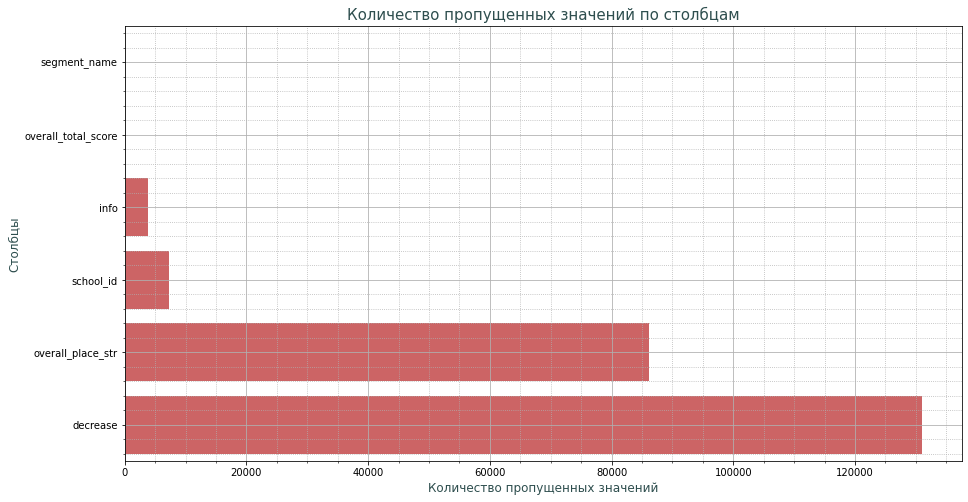

,Процент пропусков
segment_name,0.02%
overall_total_score,0.02%
info,2.21%
school_id,4.21%
overall_place_str,50.08%
decrease,76.08%



Визуализация распределения данных количественных столбцов:
id:


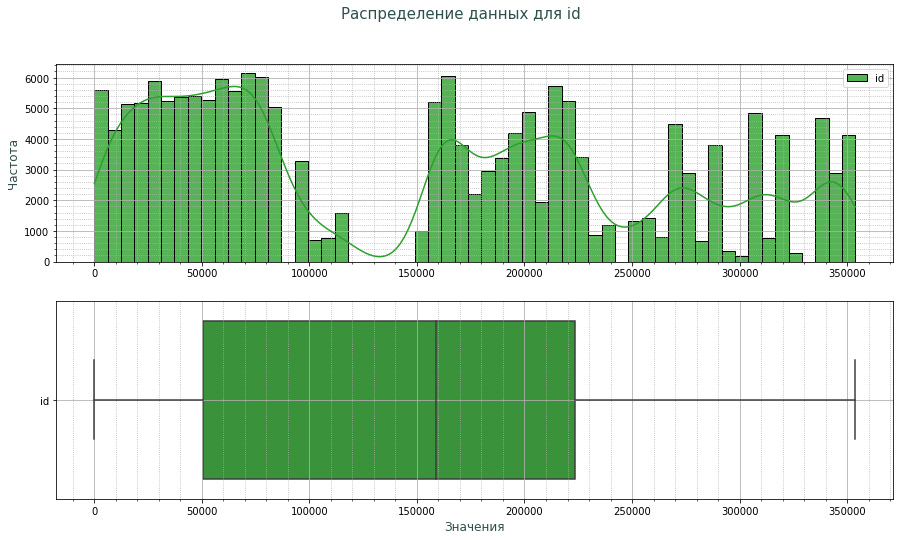

count    172158.000000
mean     148848.485444
std      107651.944104
min           1.000000
25%       50613.250000
50%      158772.500000
75%      223563.750000
max      353806.000000
Name: id, dtype: float64
total_score_id:


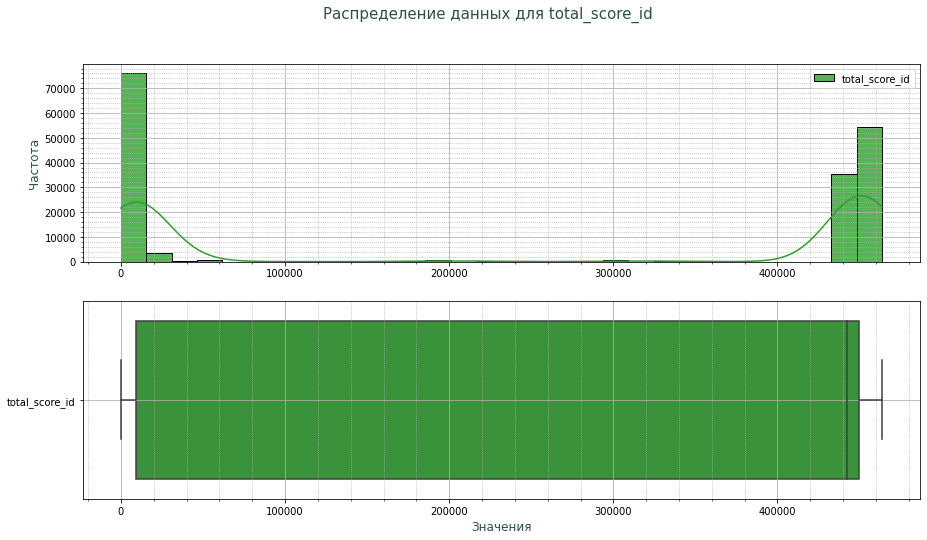

count    172158.000000
mean     243100.514156
std      219065.848493
min           1.000000
25%        9385.000000
50%      442337.000000
75%      449883.750000
max      463639.000000
Name: total_score_id, dtype: float64
base_score_x:


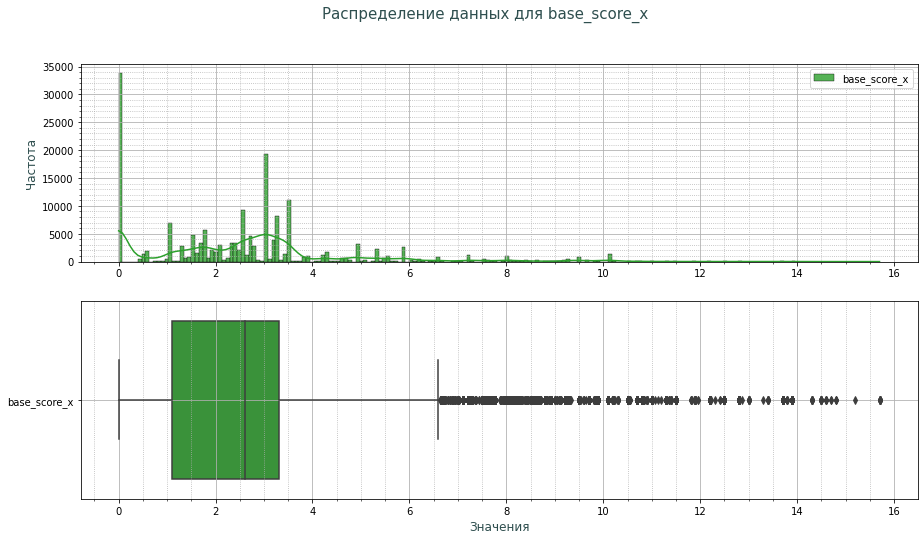

count    172158.000000
mean          2.574300
std           2.151716
min           0.000000
25%           1.100000
50%           2.600000
75%           3.300000
max          15.700000
Name: base_score_x, dtype: float64
goe:


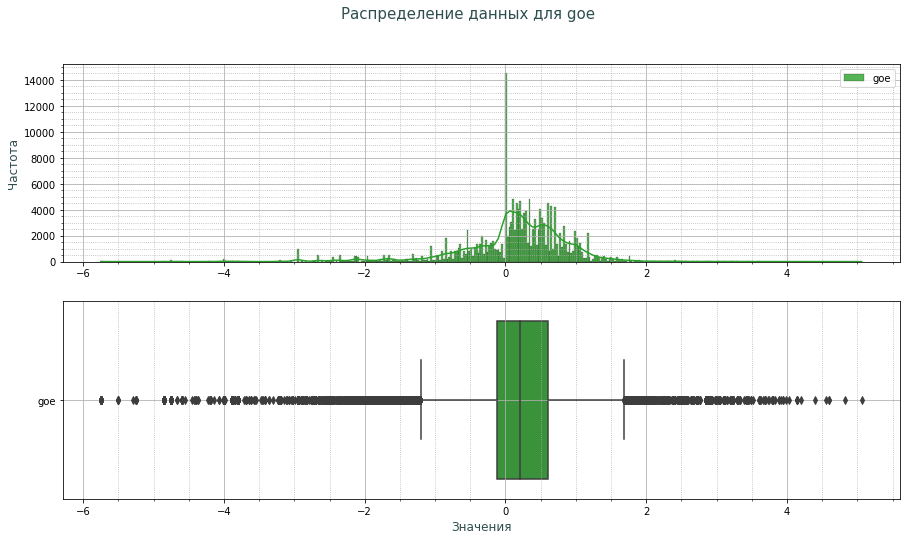

count    172158.000000
mean          0.131771
std           0.797761
min          -5.750000
25%          -0.120000
50%           0.210000
75%           0.600000
max           5.060000
Name: goe, dtype: float64
avg_score:


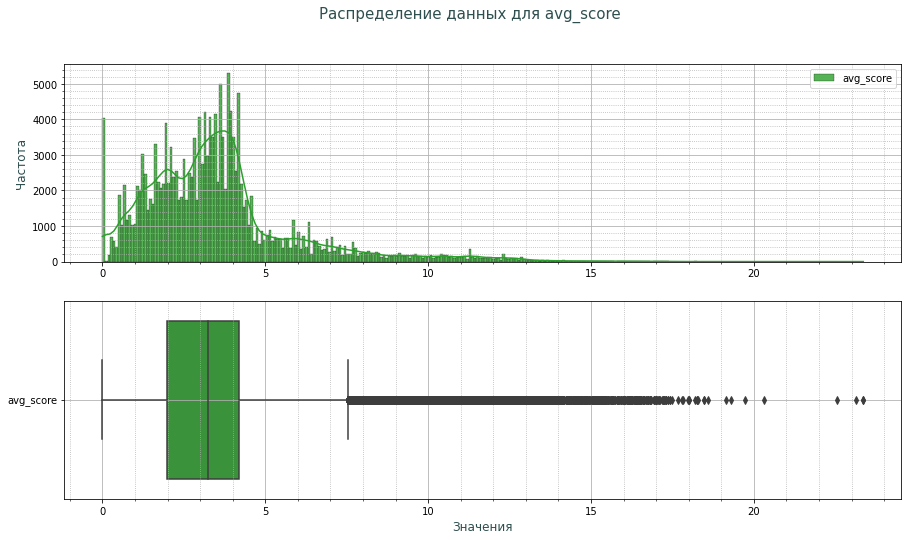

count    172158.000000
mean          3.567541
std           2.424646
min           0.000000
25%           1.980000
50%           3.250000
75%           4.200000
max          23.360000
Name: avg_score, dtype: float64
unit_id:


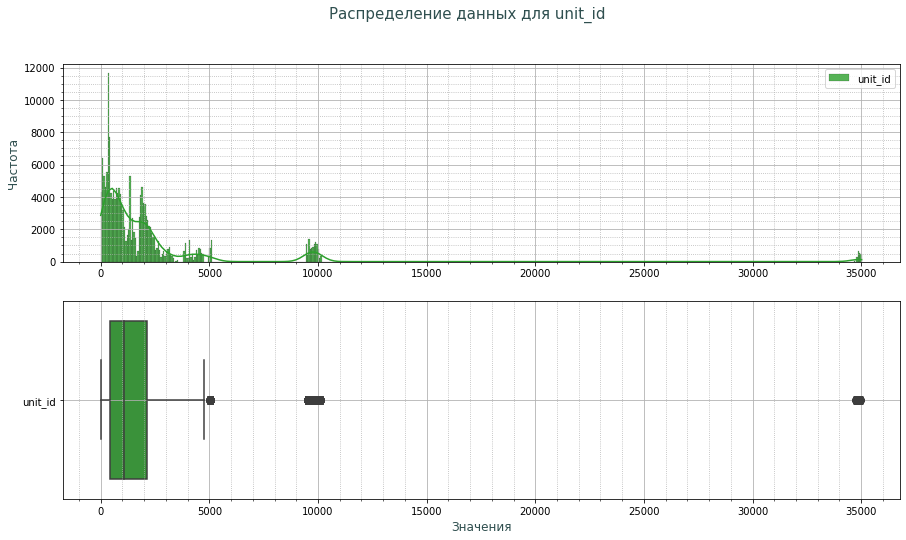

count    172158.000000
mean       2206.930465
std        4180.223001
min           1.000000
25%         409.000000
50%        1059.000000
75%        2146.000000
max       35024.000000
Name: unit_id, dtype: float64
tournament_id:


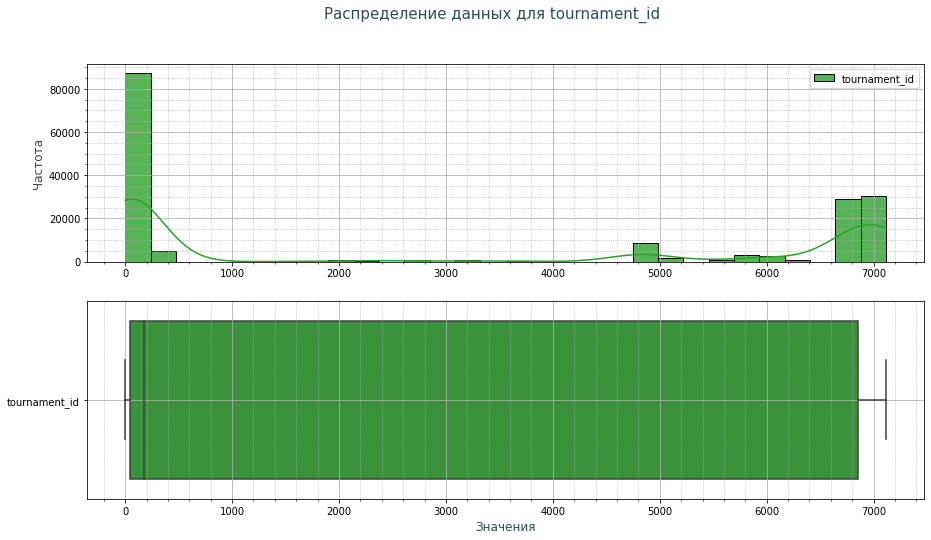

count    172158.000000
mean       3034.109539
std        3256.770873
min           1.000000
25%          47.000000
50%         177.000000
75%        6851.000000
max        7117.000000
Name: tournament_id, dtype: float64
base_score_y:


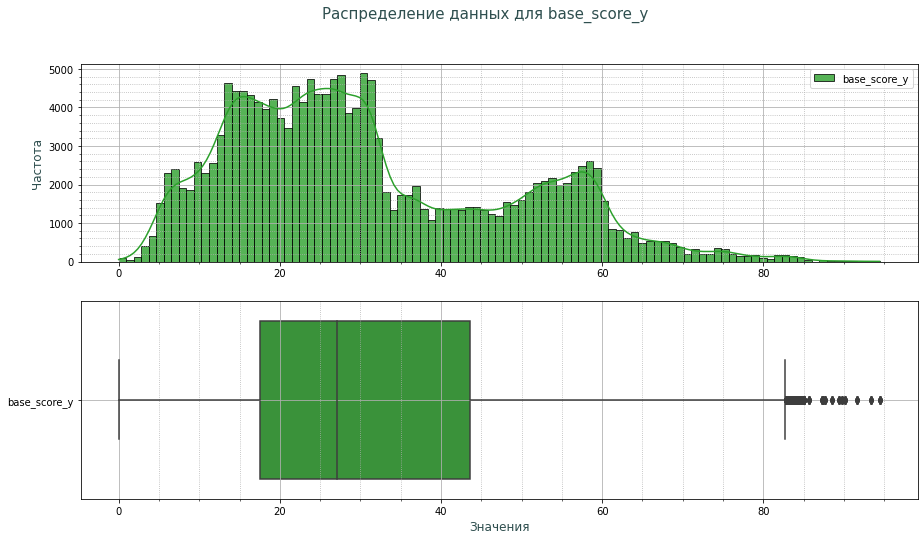

count    172158.000000
mean         31.018123
std          17.339338
min           0.000000
25%          17.520000
50%          27.080000
75%          43.590000
max          94.420000
Name: base_score_y, dtype: float64
components_score:


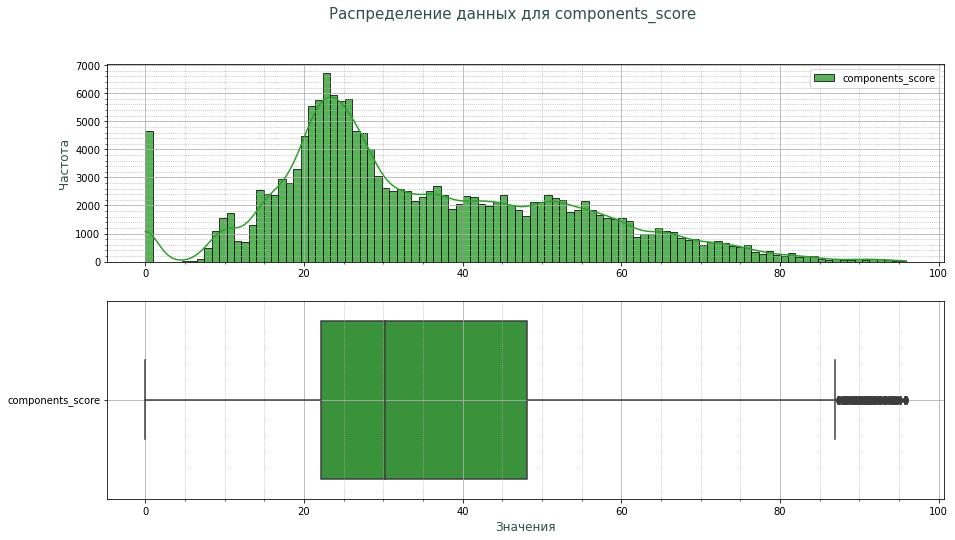

count    172158.000000
mean         35.013908
std          18.047844
min           0.000000
25%          22.130000
50%          30.190000
75%          48.060000
max          95.900000
Name: components_score, dtype: float64
total_score:


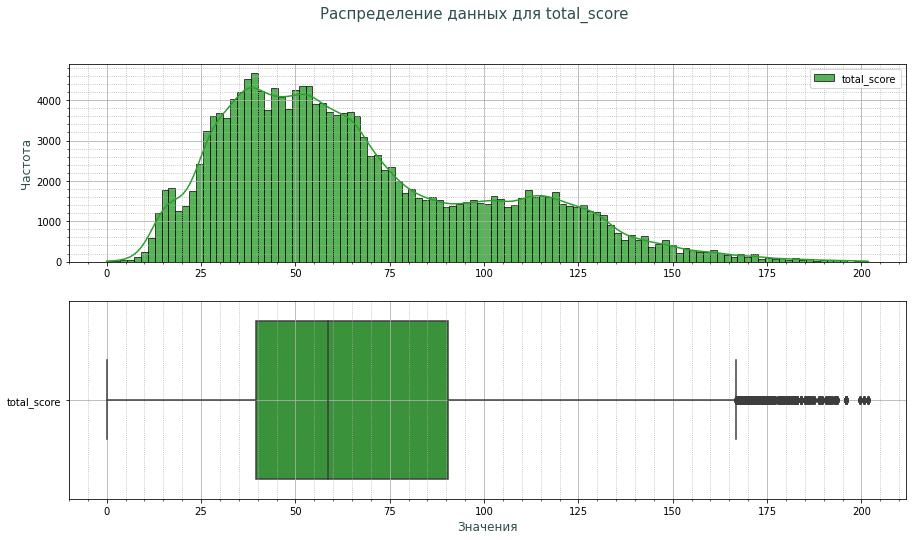

count    172158.000000
mean         67.139976
std          35.697764
min           0.000000
25%          39.530000
50%          58.630000
75%          90.450000
max         201.650000
Name: total_score, dtype: float64
elements_score:


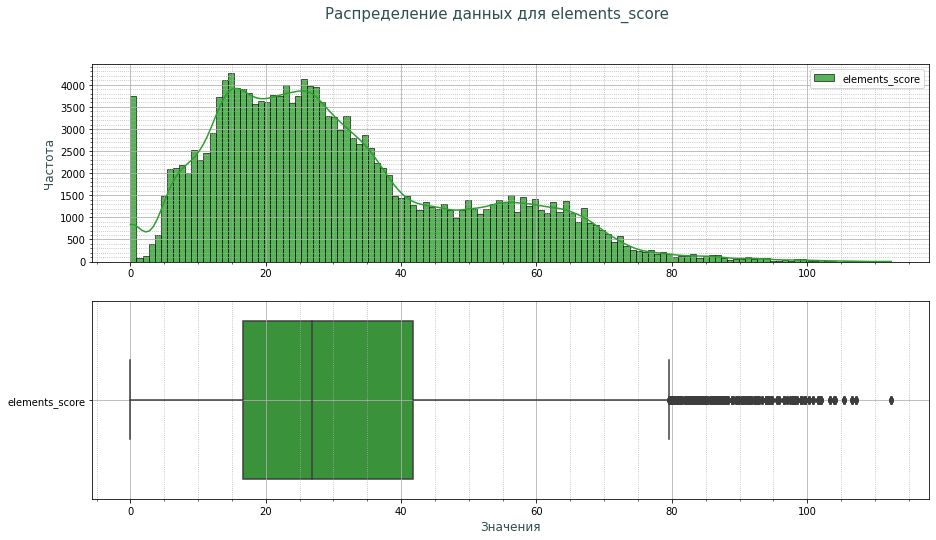

count    172158.000000
mean         30.940115
std          18.996570
min           0.000000
25%          16.590000
50%          26.880000
75%          41.790000
max         112.420000
Name: elements_score, dtype: float64
decreasings_score:


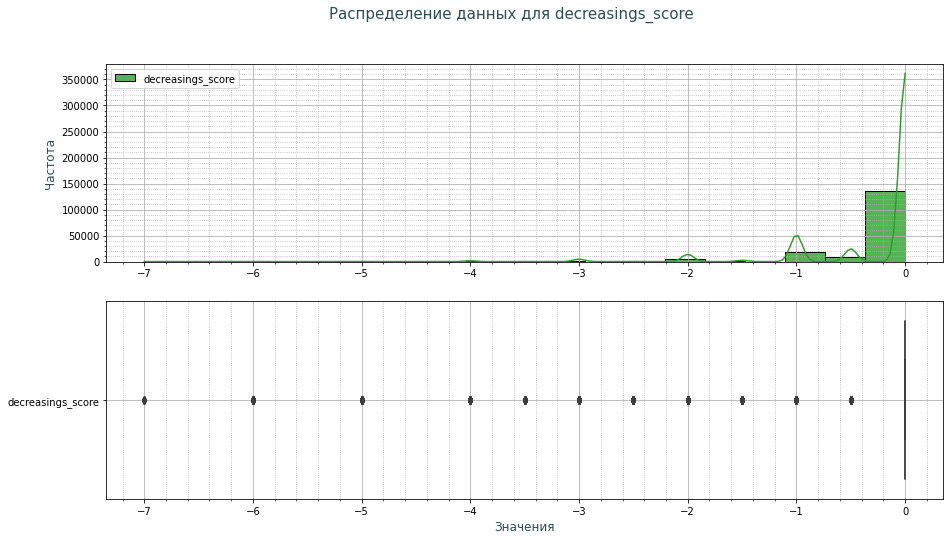

count    172158.00000
mean         -0.25846
std           0.61117
min          -7.00000
25%           0.00000
50%           0.00000
75%           0.00000
max           0.00000
Name: decreasings_score, dtype: float64
starting_place:


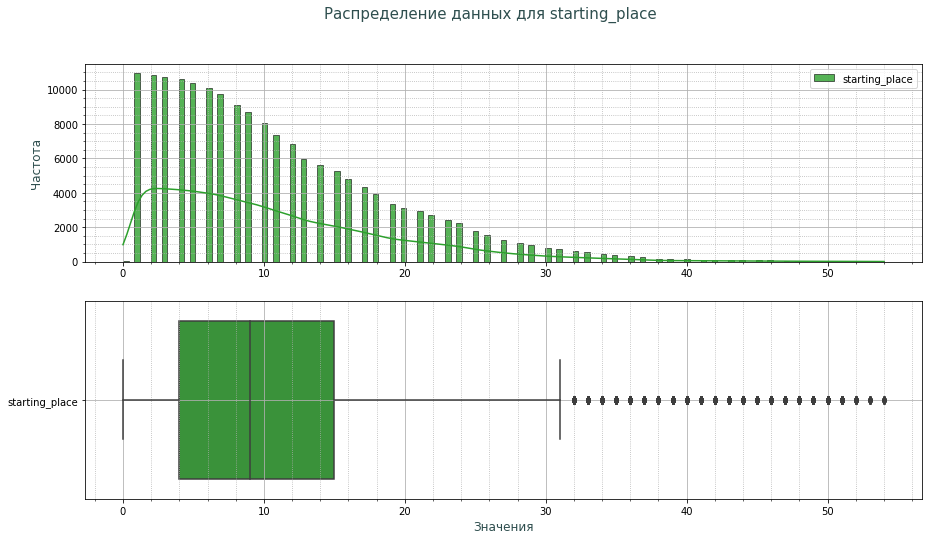

count    172158.000000
mean         10.821182
std           8.180611
min           0.000000
25%           4.000000
50%           9.000000
75%          15.000000
max          54.000000
Name: starting_place, dtype: float64
place:


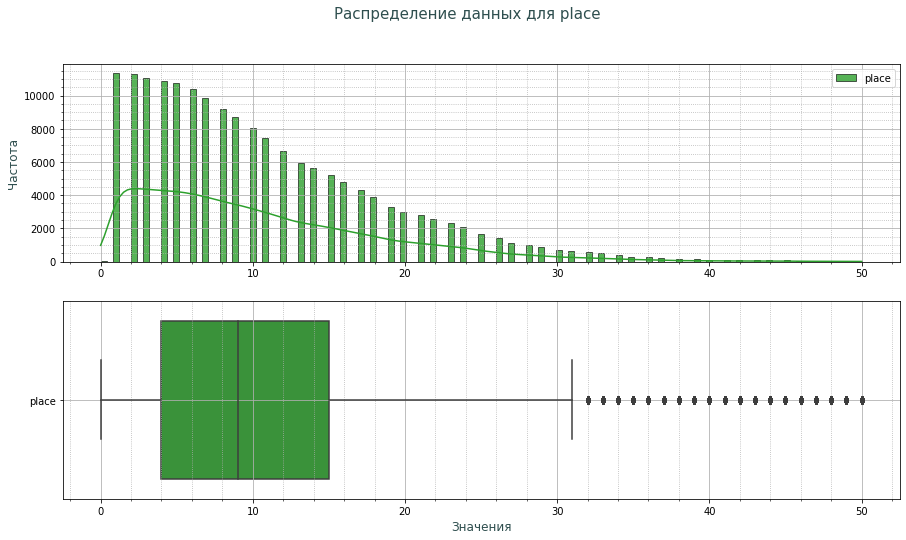

count    172158.000000
mean         10.503677
std           7.912984
min           0.000000
25%           4.000000
50%           9.000000
75%          15.000000
max          50.000000
Name: place, dtype: float64
overall_place:


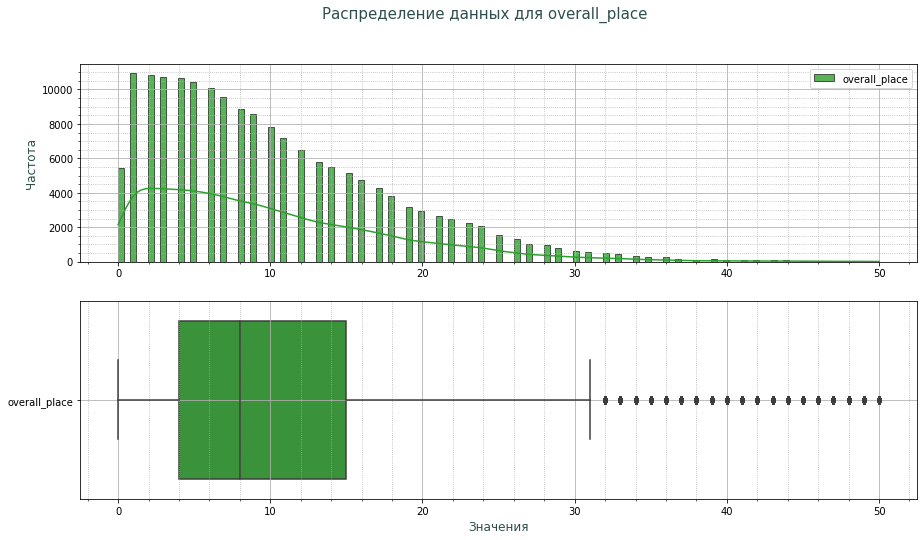

count    172158.000000
mean         10.100524
std           7.876928
min           0.000000
25%           4.000000
50%           8.000000
75%          15.000000
max          50.000000
Name: overall_place, dtype: float64
overall_total_score:


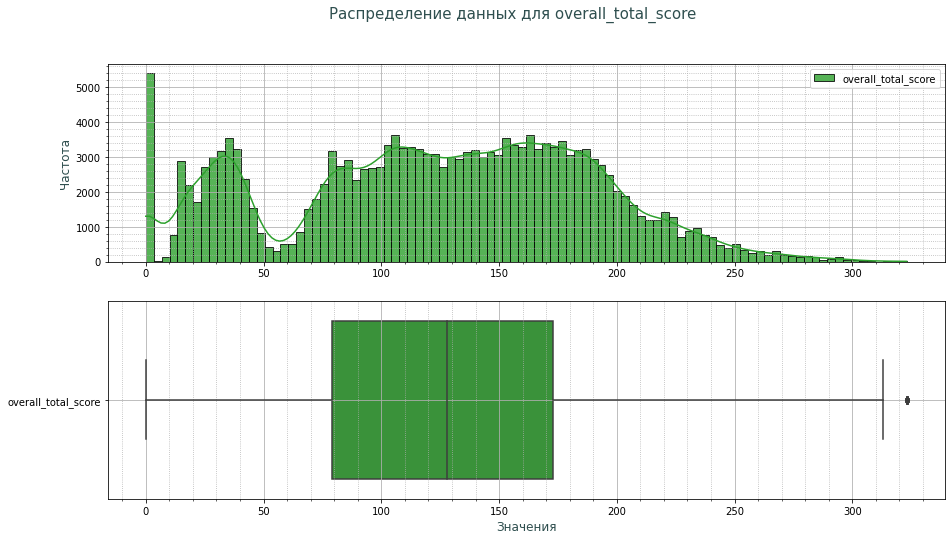

count    172115.000000
mean        123.497441
std          65.019023
min           0.000000
25%          78.920000
50%         127.710000
75%         172.840000
max         323.050000
Name: overall_total_score, dtype: float64
origin_id:


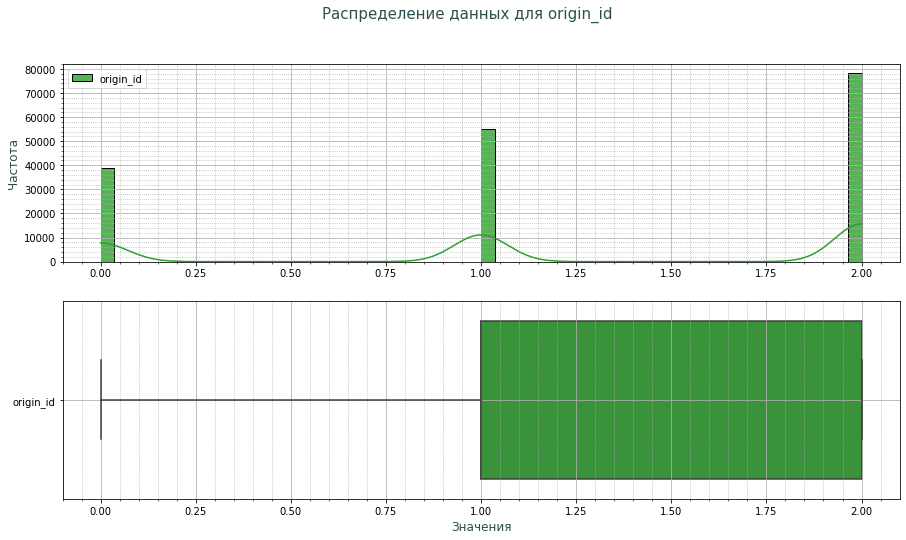

count    172158.000000
mean          1.229382
std           0.791530
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           2.000000
Name: origin_id, dtype: float64
school_id:


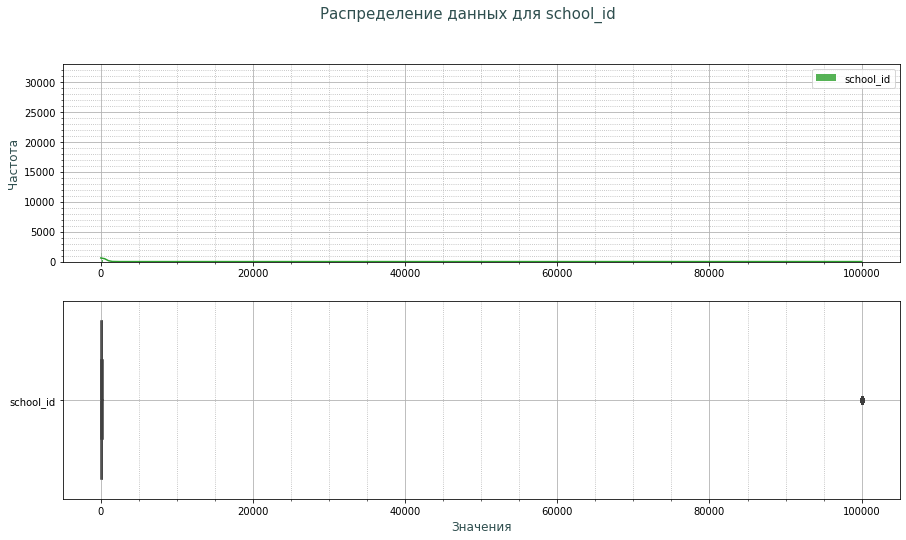

count    164913.000000
mean        460.822840
std        5705.737439
min           1.000000
25%          62.000000
50%         111.000000
75%         198.000000
max       99999.000000
Name: school_id, dtype: float64

Визуализация уникальных значений категориальных столбцов:
title:
Количество категорий: 3425
Слишком много уникальных значений (3425) для title, график не построен.
Уникальные значения:
CCoSp4              8687
2A                  8500
ChSq1               8301
CCoSp3              6064
StSq2               5097
                    ... 
3S*+1A*+SЕQ            1
2F!+2Tq+1A+SЕQ         1
3T*+3Tq*               1
2Lz+2Lo*+1A*+SЕQ       1
3Lz<+2T+2Lo<           1
Name: title, Length: 3425, dtype: int64
decrease:
Количество категорий: 32


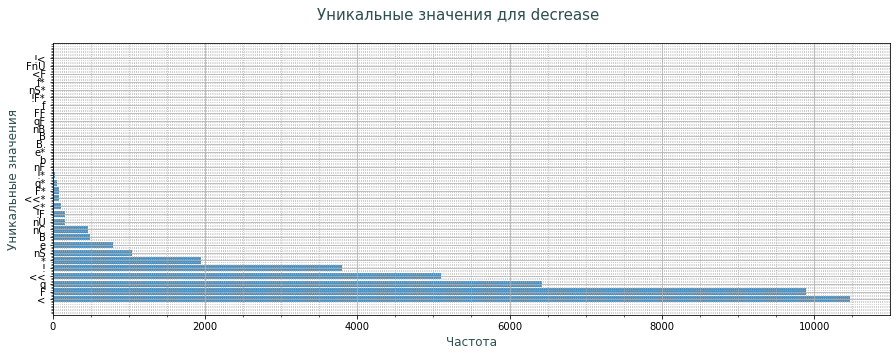

Уникальные значения:
<      10469
F       9897
q       6432
<<      5100
!       3799
*       1949
nS      1038
e        792
B        485
nC       469
nU       167
!F       164
<*       104
<<*       83
F*        81
q*        57
!*        30
nF        22
b         11
e*         7
B.         7
В          5
nB         3
qF         2
FF         2
f          2
!F*        2
nS*        2
f*         1
<F         1
FnU        1
!<         1
Name: decrease, dtype: int64
segment_name:
Количество категорий: 17


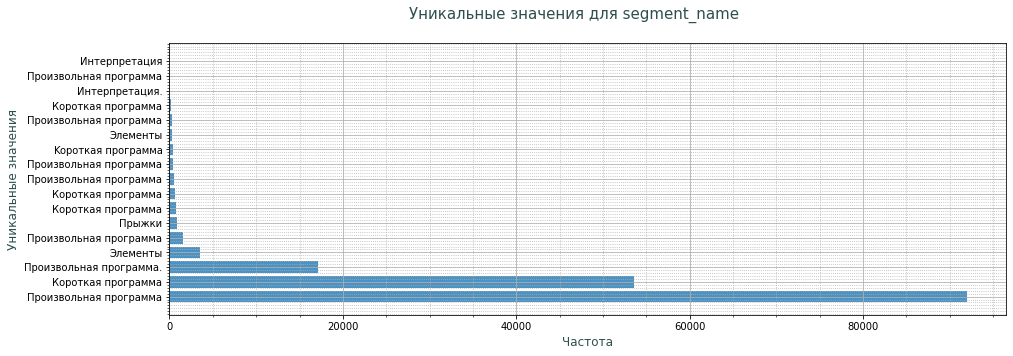

Уникальные значения:
Произвольная программа     91935
Короткая программа         53525
Произвольная программа.    17091
Элементы                    3520
Пpoизвoльнaя пpoгpaммa      1581
Прыжки                       852
Кoроткая программа           700
Кopoткaя пpoгpaммa           659
Произвольнaя программа       473
Прoизвольная прoграмма       427
Kopoткaя пpoгpaммa           377
Элeмeнты                     341
Пpoизвольная программа       315
Коpоткая программа           126
Интерпретация.               111
Пpoизвольнaя программа        70
Интерпретация                 12
Name: segment_name, dtype: int64
info:
Количество категорий: 1210
Слишком много уникальных значений (1210) для info, график не построен.
Уникальные значения:
x Надбавка за прыжки во второй половине программы (10%)                                                         21030
< Недокрученный прыжок x Надбавка за прыжки во второй половине программы (10%)                                   7586
q Прыжок приземлён в чет

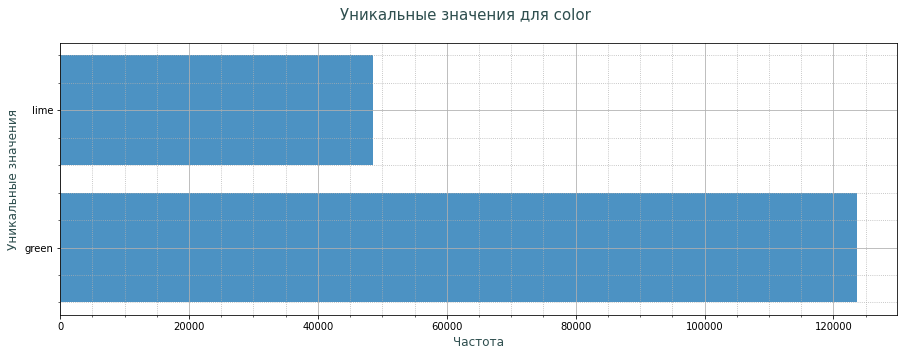

Уникальные значения:
green    123682
lime      48476
Name: color, dtype: int64


In [9]:
data_review(final_df)